**<center><h1>Naive Bayes Classifier</h1></center>**
<hr>

**Naive Bayes** is a powerful algorithm that is used for text data analysis and with problems with multiple classes. To understand Naive Bayes theorem’s working, it is important to understand the Bayes theorem concept first as it is based on the latter.

**Bayes theorem**, formulated by Thomas Bayes, calculates the probability of an event occurring based on the prior knowledge of conditions related to an event. It is based on the following formula:

**P(A|B) = P(A) * P(B|A)/P(B)**

> #  Implementing the algorithm

- ## Dataset: [SMS Spam Collection Dataset link](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [ ]:
import pandas as pd

sms_spam = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0,1])

print(sms_spam.shape)
sms_spam.head()

(5572, 2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_spam.rename(columns={"v2": "SMS", "v1": "Label"}, inplace=True)

In [ ]:
sms_spam.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_spam['Label'].value_counts(normalize=True)


ham     0.865937
spam    0.134063
Name: Label, dtype: float64

In [ ]:
# Randomize the dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


# Data Cleaning
### When a new message comes in, our multinomial Naive Bayes algorithm will make the classification based on the results it gets to these two equations below, where "w1" is the first word, and w1,w2, ..., wn is the entire message


### To make the calculations easier...

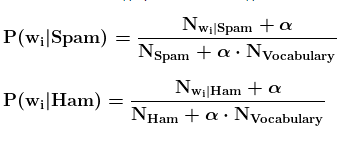

In [ ]:
# After cleaning
training_set['SMS'] = training_set['SMS'].str.replace('\W', ' ') # Removes punctuation
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head(3)

,Label,SMS
0,ham,convey my regards to him
1,ham,û_ anyway many good evenings to u s
2,ham,my sort code is and acc no is the bank is n...


In [ ]:
training_set['SMS'] = training_set['SMS'].str.split()

vocabulary = []
for sms in training_set['SMS']:
    for word in sms:
        vocabulary.append(word)

vocabulary = list(set(vocabulary))
len(vocabulary)


7766

In [ ]:
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,bergkamp,detail,matric,08712400602450p,having,ring,imposter,explosive,bigger,sent,remain,edwards,aproach,0845,page,failing,subscription,dehydrated,clark,la32wu,2exit,are,09066612661,casualty,er,teams,package,office,catches,wining,250,contribute,sextextuk,cry,unusual,disastrous,single,urgnt,because,goodnight,...,uncles,ordered,any,woulda,86888,2waxsto,facilities,83435,celebrations,emc1,pile,14thmarch,enter,nickey,gossip,wif,5wq,hook,bathing,ask,wkend,dramastorm,wish,prey,seat,cantdo,wc1n,84199,sue,1956669,6wu,were,en,return,maneesha,1win150ppmx3,pound,75max,their,jenny
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()

,Label,SMS,bergkamp,detail,matric,08712400602450p,having,ring,imposter,explosive,bigger,sent,remain,edwards,aproach,0845,page,failing,subscription,dehydrated,clark,la32wu,2exit,are,09066612661,casualty,er,teams,package,office,catches,wining,250,contribute,sextextuk,cry,unusual,disastrous,single,urgnt,...,uncles,ordered,any,woulda,86888,2waxsto,facilities,83435,celebrations,emc1,pile,14thmarch,enter,nickey,gossip,wif,5wq,hook,bathing,ask,wkend,dramastorm,wish,prey,seat,cantdo,wc1n,84199,sue,1956669,6wu,were,en,return,maneesha,1win150ppmx3,pound,75max,their,jenny
0,ham,"[convey, my, regards, to, him]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ham,"[û_, anyway, many, good, evenings, to, u, s]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ham,"[my, sort, code, is, and, acc, no, is, the, ba...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ham,"[sorry, i, din, lock, my, keypad]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spam,"[hi, babe, its, chloe, how, r, u, i, was, smas...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Isolating spam and ham messages first
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

In [ ]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
    p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
    parameters_spam[word] = p_word_given_spam

    n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
    p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
    parameters_ham[word] = p_word_given_ham

In [ ]:
import re

def classify(message):
    '''
    message: a string
    '''

    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]

        if word in parameters_ham: 
            p_ham_given_message *= parameters_ham[word]

    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)

    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')

In [ ]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')


P(Spam|message): 7.551469020619691e-26
P(Ham|message): 3.13163390665657e-27
Label: Spam


In [ ]:
classify("Sounds good, Tom, then see u there")


P(Spam|message): 4.914731817244035e-25
P(Ham|message): 4.052730830087535e-21
Label: Ham


# Measuring the Spam Filter's Accuracy


In [ ]:
def classify_test_set(message):
    
    '''
     message: a string
     '''

    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]

        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]

    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [ ]:
test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()

,Label,SMS,predicted
0,ham,S...from the training manual it show there is ...,ham
1,spam,Do you want a new Video phone? 600 anytime any...,spam
2,ham,True. Its easier with her here.,ham
3,ham,Midnight at the earliest,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


In [ ]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
   row = row[1]
   if row['Label'] == row['predicted']:
      correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)


Correct: 1107
Incorrect: 7
Accuracy: 0.9937163375224417


---

# **Checking results by sklearn**

In [ ]:
train_data = training_set_clean.copy().drop(['SMS'], axis='columns')

train_data.Label = train_data['Label'].replace('spam', 1)
train_data.Label = train_data['Label'].replace('ham', 0)

train_data.head()

,Label,bergkamp,detail,matric,08712400602450p,having,ring,imposter,explosive,bigger,sent,remain,edwards,aproach,0845,page,failing,subscription,dehydrated,clark,la32wu,2exit,are,09066612661,casualty,er,teams,package,office,catches,wining,250,contribute,sextextuk,cry,unusual,disastrous,single,urgnt,because,...,uncles,ordered,any,woulda,86888,2waxsto,facilities,83435,celebrations,emc1,pile,14thmarch,enter,nickey,gossip,wif,5wq,hook,bathing,ask,wkend,dramastorm,wish,prey,seat,cantdo,wc1n,84199,sue,1956669,6wu,were,en,return,maneesha,1win150ppmx3,pound,75max,their,jenny
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_data[train_data.columns.difference(['Label'])]
y = train_data['Label']

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NBClassifier = MultinomialNB()

NBClassifier.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
test_set = test_set[['Label', 'SMS']]
test_set.head()

,Label,SMS
0,ham,S...from the training manual it show there is ...
1,spam,Do you want a new Video phone? 600 anytime any...
2,ham,True. Its easier with her here.
3,ham,Midnight at the earliest
4,ham,"All done, all handed in. Don't know if mega sh..."


In [ ]:
test_set.Label = test_set['Label'].replace('spam', 1)
test_set.Label = test_set['Label'].replace('ham', 0)

In [ ]:
# After cleaning
test_set['SMS'] = test_set['SMS'].str.replace('\W', ' ') # Removes punctuation
test_set['SMS'] = test_set['SMS'].str.lower()
test_set['SMS'] = test_set['SMS'].str.split()

test_set.head()

,Label,SMS
0,0,"[s, from, the, training, manual, it, show, the..."
1,1,"[do, you, want, a, new, video, phone, 600, any..."
2,0,"[true, its, easier, with, her, here]"
3,0,"[midnight, at, the, earliest]"
4,0,"[all, done, all, handed, in, don, t, know, if,..."


In [ ]:
word_counts_per_sms = {unique_word: [0] * len(test_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(test_set['SMS']):
    for word in sms:
      if word in vocabulary:
        word_counts_per_sms[word][index] += 1

word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,bergkamp,detail,matric,08712400602450p,having,ring,imposter,explosive,bigger,sent,remain,edwards,aproach,0845,page,failing,subscription,dehydrated,clark,la32wu,2exit,are,09066612661,casualty,er,teams,package,office,catches,wining,250,contribute,sextextuk,cry,unusual,disastrous,single,urgnt,because,goodnight,...,uncles,ordered,any,woulda,86888,2waxsto,facilities,83435,celebrations,emc1,pile,14thmarch,enter,nickey,gossip,wif,5wq,hook,bathing,ask,wkend,dramastorm,wish,prey,seat,cantdo,wc1n,84199,sue,1956669,6wu,were,en,return,maneesha,1win150ppmx3,pound,75max,their,jenny
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_set_clean = pd.concat([test_set, word_counts], axis=1)
test_set_clean.head()

,Label,SMS,bergkamp,detail,matric,08712400602450p,having,ring,imposter,explosive,bigger,sent,remain,edwards,aproach,0845,page,failing,subscription,dehydrated,clark,la32wu,2exit,are,09066612661,casualty,er,teams,package,office,catches,wining,250,contribute,sextextuk,cry,unusual,disastrous,single,urgnt,...,uncles,ordered,any,woulda,86888,2waxsto,facilities,83435,celebrations,emc1,pile,14thmarch,enter,nickey,gossip,wif,5wq,hook,bathing,ask,wkend,dramastorm,wish,prey,seat,cantdo,wc1n,84199,sue,1956669,6wu,were,en,return,maneesha,1win150ppmx3,pound,75max,their,jenny
0,0,"[s, from, the, training, manual, it, show, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,"[do, you, want, a, new, video, phone, 600, any...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,"[true, its, easier, with, her, here]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,"[midnight, at, the, earliest]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,"[all, done, all, handed, in, don, t, know, if,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = test_set_clean[test_set_clean.columns.difference(['Label', 'SMS'])]
y_test = test_set_clean['Label']

In [ ]:
y_pred = NBClassifier.predict(X_test)

y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
NBClassifier.score(X_test, y_test)

0.9937163375224417

In [ ]:
print("Correct:", sum(y_test == y_pred))
print("Not Correct:", sum(y_test != y_pred))

Correct: 1107
Not Correct: 7


> **We got the same results as the implementaion above.**

---